# Campus Recruitment Prediction

Name: Aruna Gurung

Student ID: c0896129

**Dataset Exploration**

The train dataset has 215 records and 15 features. Below given is the features in the dataset along with their short descriptions:

- **sl_no**: Serial Number
- **gender**: Gender (0 for male, 1 for female)
- **ssc_p**: Secondary Education percentage (10th Grade)
- **ssc_b**: Board of Education (Central or Others)
- **hsc_p**: Higher Secondary Education percentage (12th Grade)
- **hsc_b**: Board of Education (Central or Others)
- **hsc_s**: Specialization in Higher Secondary Education (Commerce, Science, Arts)
- **degree_p**: Degree percentage
- **degree_t**: Type of undergraduate degree (Sci&Tech, Comm&Mgmt, Others)
- **workex**: Work Experience (Yes or No)
- **etest_p**: E-test percentage
- **specialisation**: MBA Specialization (Mkt&HR or Mkt&Fin)
- **mba_p**: MBA percentage
- **status**: Placement status (Placed or Not Placed)
- **salary**: Salary offered (NaN if not placed)

Among these features, we have 7 categorical features and 8 numerical features.

**Categorical Features**: 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'

**Numerical Features**: 'sl_no', 'gender', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'

In [ ]:
# Mounting Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

### 1. Load the dataset

In [ ]:
# Loading the train dataset
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
# Let's explore the train dataset

# displaying first five rows of the dataset
train_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
# Displaying rows and columns in the dataset
train_df.shape

(215, 15)

In [ ]:
# Displaying summary of the training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


### 2. Data Preprocessing

In [ ]:
# From the above output, we can see that the salary column has only 148 values unlinke other columns that have 215 values.
# Let's double check for the missing values
train_df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
# Displaying rows with missing values in the salary column
missing = train_df[train_df.isnull().any(axis=1)]
missing

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,0,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,0,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,1,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,0,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,1,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,1,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,0,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,0,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,1,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


In [ ]:
'''
 We can see that the status of these records is set to 'Not Placed' which implies that their salary would be zero. So let's impute 0 in
 place of the null value
'''

train_df['salary'].fillna(0,inplace=True)

In [ ]:
# Let's check if we still have any missing values in the dataset
train_df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
# The column sl_no is nothing but an index which we do not require in our dataset so let's drop it
train_df.drop(columns='sl_no', inplace=True)

In [ ]:
# Checking the new dimension of the dataset
train_df.shape

(215, 14)

In [ ]:
train_df['ssc_b'].value_counts()

ssc_b
Central    116
Others      99
Name: count, dtype: int64

In [ ]:
train_df['hsc_b'].value_counts()

hsc_b
Others     131
Central     84
Name: count, dtype: int64

In [ ]:
train_df['hsc_s'].value_counts()

hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64

In [ ]:
train_df['degree_t'].value_counts()

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

In [ ]:
train_df['workex'].value_counts()

workex
No     141
Yes     74
Name: count, dtype: int64

In [ ]:
train_df['specialisation'].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [ ]:
train_df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [ ]:
# Everything looks good. Let's encode these features using one-hot encoding
train_df_encoded = pd.get_dummies(train_df, columns=['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'], drop_first=True, dtype=int)

In [ ]:
# Let's see if the encoding is done or not
train_df_encoded

,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,0,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,0,0,1,0,1,1
1,0,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,0,1,0,1,1,0,1
2,0,65.00,68.00,64.00,75.0,57.80,250000.0,0,0,0,0,0,0,0,0,1
3,0,56.00,52.00,52.00,66.0,59.43,0.0,0,0,0,1,0,1,0,1,0
4,0,85.80,73.60,73.30,96.8,55.50,425000.0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,77.60,91.0,74.49,400000.0,1,1,1,0,0,0,0,0,1
211,0,58.00,60.00,72.00,74.0,53.62,275000.0,1,1,0,1,0,1,0,0,1
212,0,67.00,67.00,73.00,59.0,69.72,295000.0,1,1,1,0,0,0,1,0,1
213,1,74.00,66.00,58.00,70.0,60.23,204000.0,1,1,1,0,0,0,0,1,1


## 3. Exploratory Data Analysis

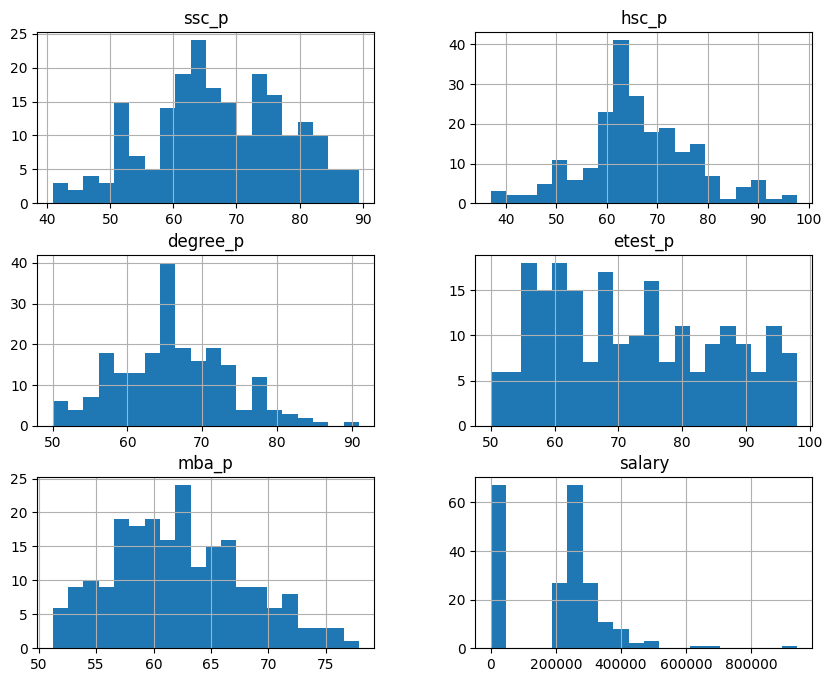

In [ ]:
# Visualizing distribution of numerical columns
numerical_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
train_df_encoded[numerical_features].hist(figsize=(10, 8), bins=20)
plt.show()

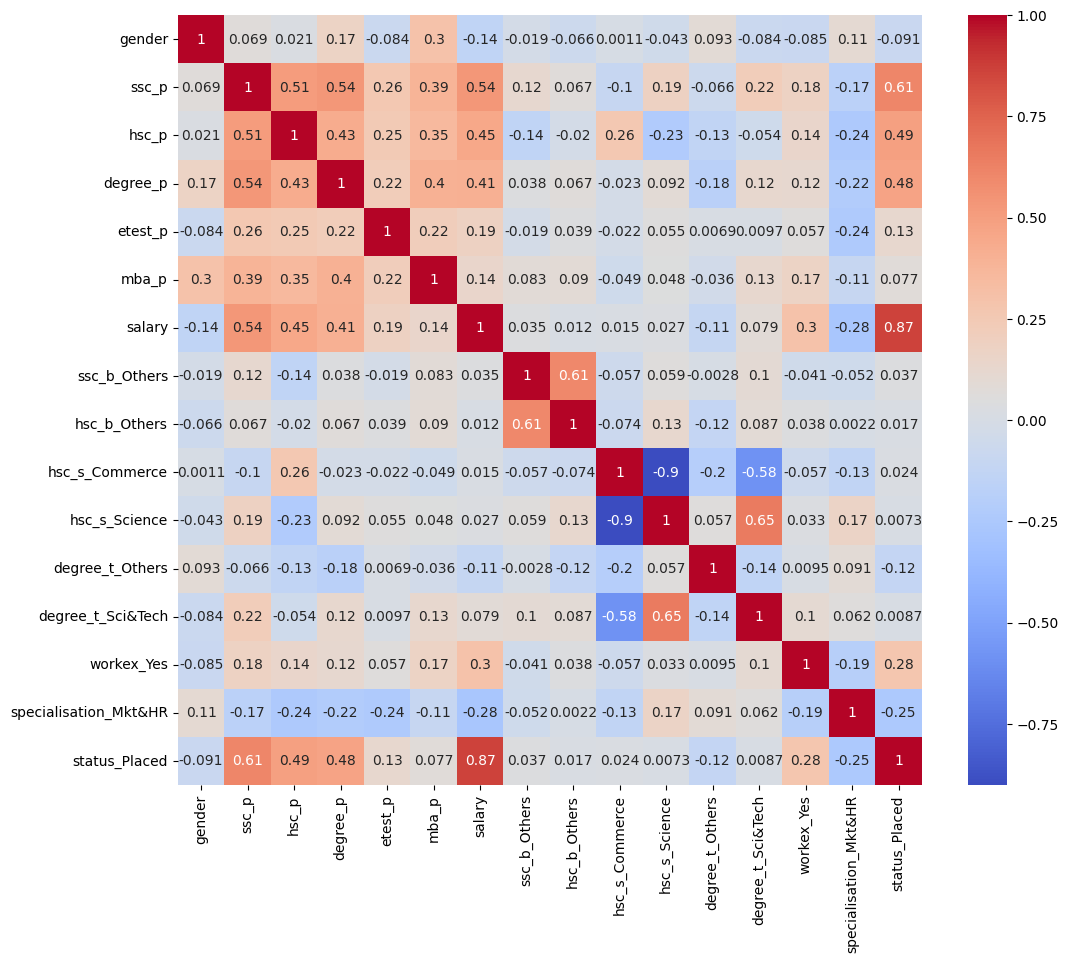

In [ ]:
# Visualizing the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(train_df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

## 4. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Defining models
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier()
}

# Defining parameter grids for each model
param_grids = {
    'LogisticRegression': {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'SVC': {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Performing grid search for each model
best_models = {}
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Storing best model and its parameters
    best_models[model_name] = {
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

# Printing best parameters and scores for each model
for model_name, results in best_models.items():
    print(f"Best parameters for {model_name}: {results['best_params']}")
    print(f"Best cross-validation score for {model_name}: {results['best_score']}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score for LogisticRegression: 1.0

Best parameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score for SVC: 1.0

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for RandomForestClassifier: 1.0



## 5. Model Training

In [ ]:
# Splitting the dataset into train and test
X = train_df_encoded.drop(columns=['status_Placed']) # Independent variables
y = train_df_encoded['status_Placed'] # Dependent Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initializing models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
svc_clf = SVC()

In [ ]:
# training the first model: Logistic Regression
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# training the second model: Random Forest Classifier
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# training the third model: Support Vector Classifier
svc_clf.fit(X_train, y_train)

SVC()

## 6. Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
log_reg_pred = log_reg.predict(X_test)
rf_clf_pred = rf_clf.predict(X_test)
svc_clf_pred = svc_clf.predict(X_test)

# Evaluation
log_reg_metrics = {
    'Accuracy': accuracy_score(y_test, log_reg_pred),
    'Precision': precision_score(y_test, log_reg_pred),
    'Recall': recall_score(y_test, log_reg_pred),
    'F1-Score': f1_score(y_test, log_reg_pred)
}

rf_clf_metrics = {
    'Accuracy': accuracy_score(y_test, rf_clf_pred),
    'Precision': precision_score(y_test, rf_clf_pred),
    'Recall': recall_score(y_test, rf_clf_pred),
    'F1-Score': f1_score(y_test, rf_clf_pred)
}

svc_clf_metrics = {
    'Accuracy': accuracy_score(y_test, svc_clf_pred),
    'Precision': precision_score(y_test, svc_clf_pred),
    'Recall': recall_score(y_test, svc_clf_pred),
    'F1-Score': f1_score(y_test, svc_clf_pred)
}
print(f'Model Evaluation: \n')
print(f'Logistic Regression: \n', log_reg_metrics)
print(f'Random Forest Classifier: \n', rf_clf_metrics)
print(f'Support Vector Classifier: \n', svc_clf_metrics)

Model Evaluation: 

Logistic Regression: 
 {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}
Random Forest Classifier: 
 {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}
Support Vector Classifier: 
 {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}


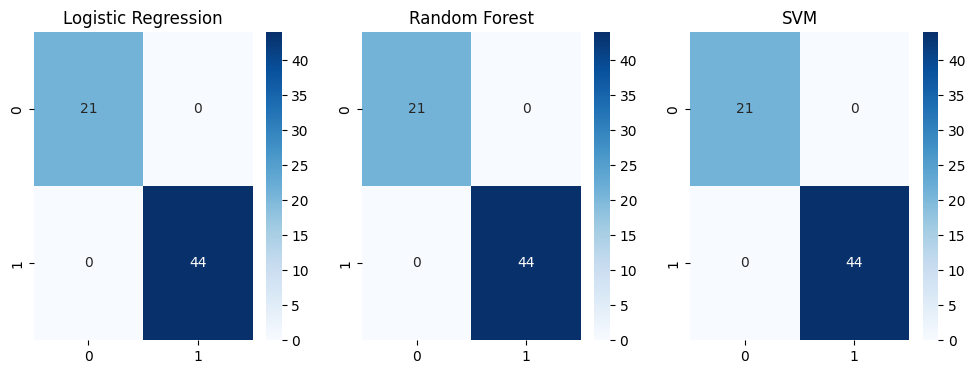

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrices
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
rf_clf_cm = confusion_matrix(y_test, rf_clf_pred)
svc_clf_cm = confusion_matrix(y_test, svc_clf_pred)

# Plot confusion matrices
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression')

plt.subplot(1, 3, 2)
sns.heatmap(rf_clf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest')

plt.subplot(1, 3, 3)
sns.heatmap(svc_clf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM')

plt.show()

## 7. Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

# Voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', rf_clf),
    ('svc', svc_clf)
], voting='hard')

# Training the Voting Classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [ ]:
# Performance Classifier
voting_pred = voting_clf.predict(X_test)

# Calculating accuracy of the voting classifier
voting_metrics = {
    'Accuracy': accuracy_score(y_test, voting_pred),
    'Precision': precision_score(y_test, voting_pred),
    'Recall': recall_score(y_test, voting_pred),
    'F1-Score': f1_score(y_test, voting_pred)
}

voting_metrics

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}

In [ ]:
# Print evaluation results
print('Model Evaluation:')
print('Logistic Regression:')
for metric, value in log_reg_metrics.items():
    print(f'{metric}: {value:.4f}')
print('\nRandom Forest Classifier:')
for metric, value in rf_clf_metrics.items():
    print(f'{metric}: {value:.4f}')
print('\nSupport Vector Classifier:')
for metric, value in svc_clf_metrics.items():
    print(f'{metric}: {value:.4f}')
print('\nVoting Classifier:')
for metric, value in voting_metrics.items():
    print(f'{metric}: {value:.4f}')

Model Evaluation:
Logistic Regression:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Random Forest Classifier:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Support Vector Classifier:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Voting Classifier:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


## 8. Creating Pickle Files

In [ ]:
import pickle
# Saving models to pickle files
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

with open('svc_model.pkl', 'wb') as f:
    pickle.dump(svc_clf, f)

with open('voting_classifier_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)